In [35]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#loading the dataset
df = pd.read_csv('job_descriptions.csv')

In [37]:
#dispalying first few rows
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [38]:
#summary statistics
df.describe()

,Job Id,latitude,longitude,Company Size
count,1.615940e+06,1.615940e+06,1.615940e+06,1.615940e+06
mean,1.548935e+15,1.937743e+01,1.639926e+01,7.370467e+04
std,8.946722e+14,2.355690e+01,7.066762e+01,3.529886e+04
min,1.817948e+11,-4.090060e+01,-1.751982e+02,1.264600e+04
25%,7.740508e+14,5.152100e+00,-1.531010e+01,4.311400e+04
50%,1.547858e+15,1.807080e+01,1.914510e+01,7.363300e+04
75%,2.323729e+15,3.907420e+01,4.757690e+01,1.043000e+05
max,3.099618e+15,7.170690e+01,1.780650e+02,1.348340e+05


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

In [40]:
#checking for null values
df.isnull().sum()

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

In [41]:
# List of columns to drop
unwanted_columns = ['Job Id', 'Preference','Contact Person', 'Contact', 'Job Portal','Benefits', 'Company Profile','Company Size']

# Drop unwanted columns
df= df.drop(columns=unwanted_columns)

In [42]:
# Display the size of the dataset in MB
size_mb = df.memory_usage().sum() / (1024 * 1024)
print(f"Data size: {size_mb:.2f} MB")

Data size: 184.93 MB


In [43]:
# Display the shape of the dataset
df.shape

(1615940, 15)

In [44]:
# Convert 'Job Posting Date' to datetime
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'])
df['Year'] = df['Job Posting Date'].dt.year
df['Month'] = df['Job Posting Date'].dt.month
df['Day'] = df['Job Posting Date'].dt.day

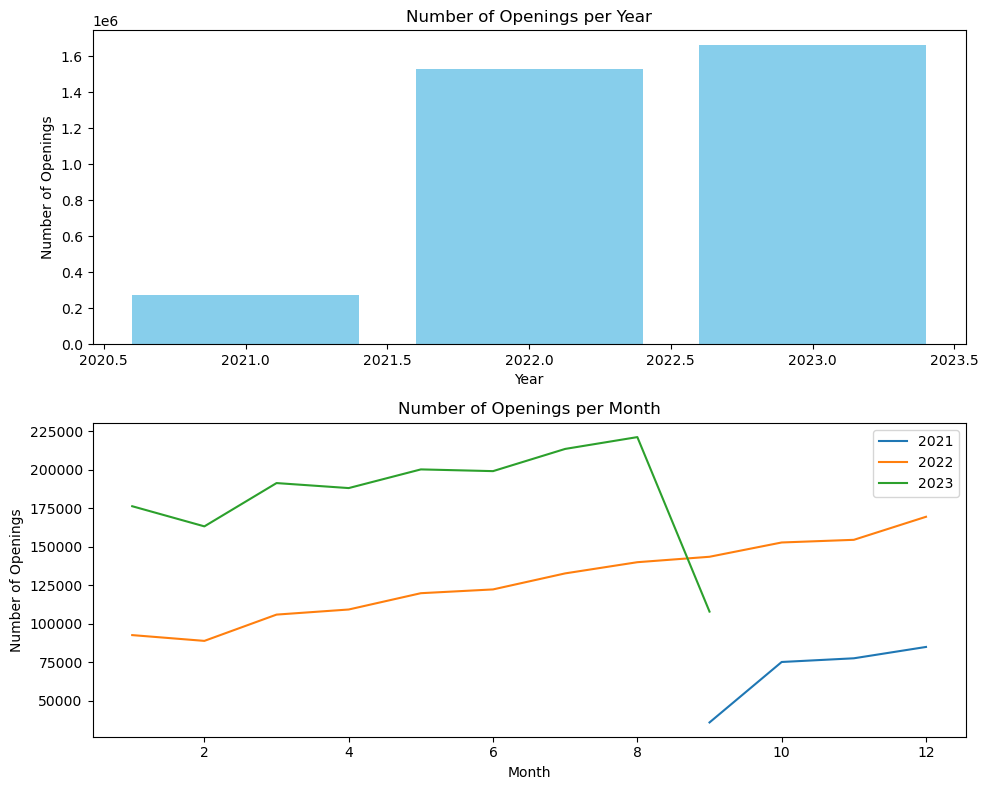

In [46]:
ds = pd.read_csv('jobs_postings.csv')
ds['Job Posting Date'] = pd.to_datetime(ds['Job Posting Date'])

# Extract year and month from the date
ds['Year'] = ds['Job Posting Date'].dt.year
ds['Month'] = ds['Job Posting Date'].dt.month

# Aggregate the data by year and month
yearly_openings = ds.groupby('Year')['Openings'].sum()
monthly_openings = ds.groupby(['Year', 'Month'])['Openings'].sum()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot number of openings per year
axs[0].bar(yearly_openings.index, yearly_openings.values, color='skyblue')
axs[0].set_title('Number of Openings per Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Openings')

# Plot number of openings per month
for year in monthly_openings.index.levels[0]:
    axs[1].plot(monthly_openings[year].index, monthly_openings[year].values, label=year)

axs[1].set_title('Number of Openings per Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Openings')
axs[1].legend()

plt.tight_layout()
plt.show()

In [47]:
unique_roles_count = df['Role'].nunique()


# Display the count of unique roles
print("Count of Unique Roles:", unique_roles_count)

Count of Unique Roles: 376


In [49]:
# Calculate role counts for each date
role_counts_by_date = df.groupby(['Job Posting Date', 'Role']).size().unstack(fill_value=0)

# Sum the counts of all roles across all dates
total_counts_all_roles = role_counts_by_date.sum(axis=1)

# Convert the total counts of all roles to a DataFrame with a single column
data = pd.DataFrame(total_counts_all_roles, columns=['Openings'])

data = total_counts_all_roles.reset_index()

# Rename the columns to match the desired output
data.columns = ['Job Posting Date', 'Openings']
data = pd.DataFrame(data)
data.to_csv('job_postings.csv', index=False)


In [50]:
#loading the dataset
ds = pd.read_csv('jobs_postings.csv')
ds

,Job Posting Date,Openings
0,2021-09-15,2287
1,2021-09-16,2100
2,2021-09-17,2100
3,2021-09-18,2100
4,2021-09-19,2566
...,...,...
726,2023-09-11,7245
727,2023-09-12,7103
728,2023-09-13,7400
729,2023-09-14,7251


In [51]:
ds_train=ds["Openings"][:len(ds["Openings"])-30]
ds_test=ds["Openings"][len(ds["Openings"])-30:]

<AxesSubplot:>

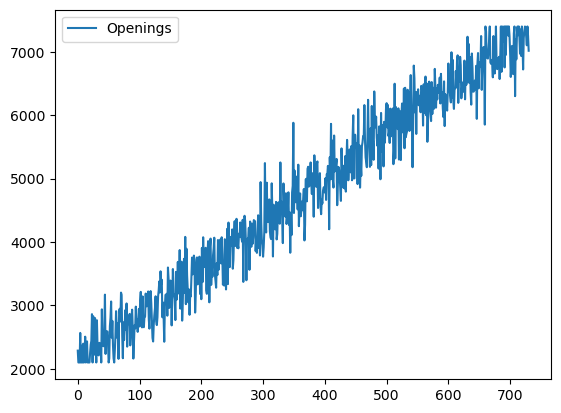

In [52]:
ds.plot()

In [53]:
#Check for stationarity of time series
#ADF test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(ds["Openings"])
print(f'p-value: {adf_test[1]}')

p-value: 0.899450473240986


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


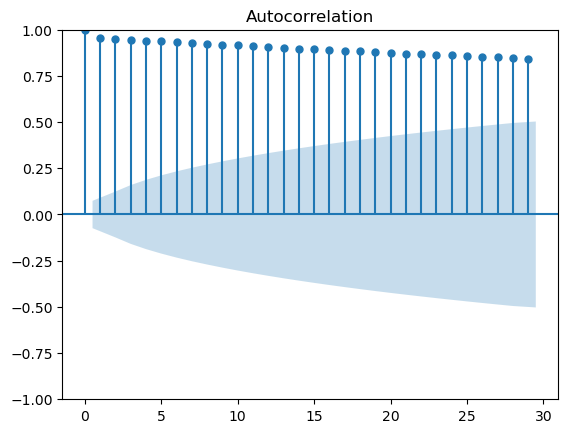

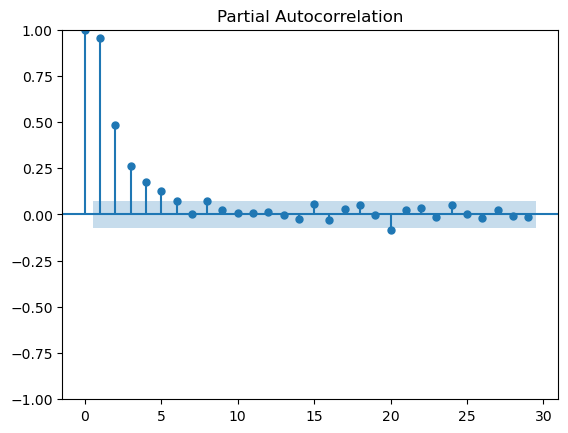

In [54]:
#ACF plot and PACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(ds_train)

pacf_original = plot_pacf(ds_train)

<AxesSubplot:>

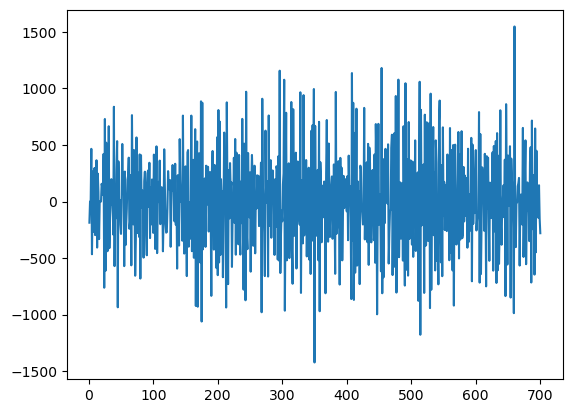

In [55]:
#differencing
ds_train_diff = ds_train.diff().dropna()
ds_train_diff.plot()

In [56]:
adf_test = adfuller(ds_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 1.729643450414223e-20


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


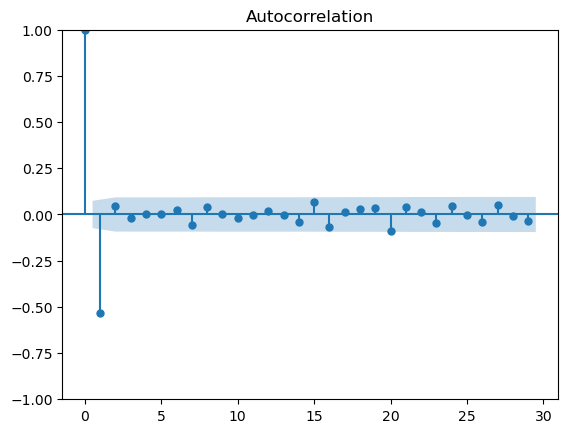

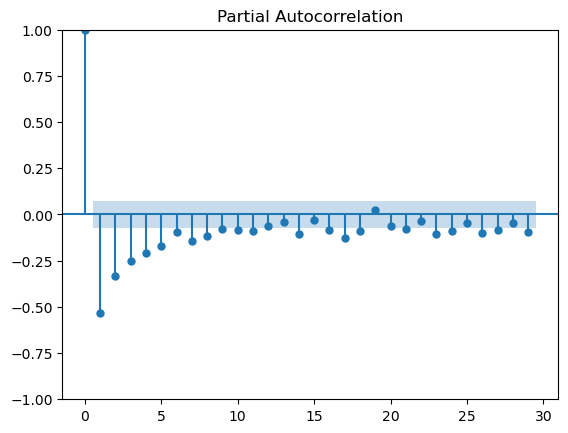

In [57]:
acf_diff = plot_acf(ds_train_diff)
pacf_diff = plot_pacf(ds_train_diff)

In [58]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ds_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Openings   No. Observations:                  701
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -5100.301
Date:                Sun, 19 May 2024   AIC                          10206.603
Time:                        00:32:50   BIC                          10220.256
Sample:                             0   HQIC                         10211.880
                                - 701                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7055      0.035    -20.316      0.000      -0.774      -0.637
ar.L2         -0.3290      0.034     -9.577      0.000      -0.396      -0.262
sigma2      1.251e+05   6472.727     19.321      0.0

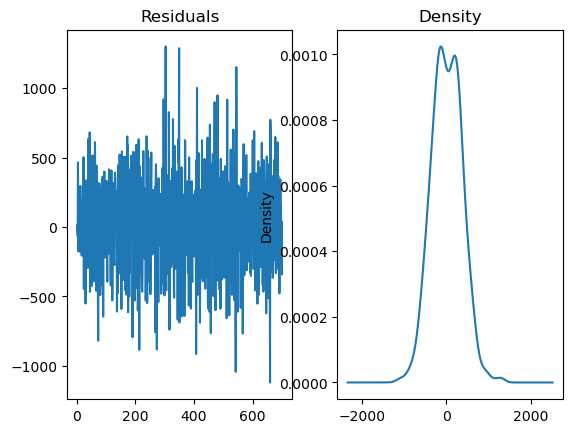

In [59]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

<AxesSubplot:>

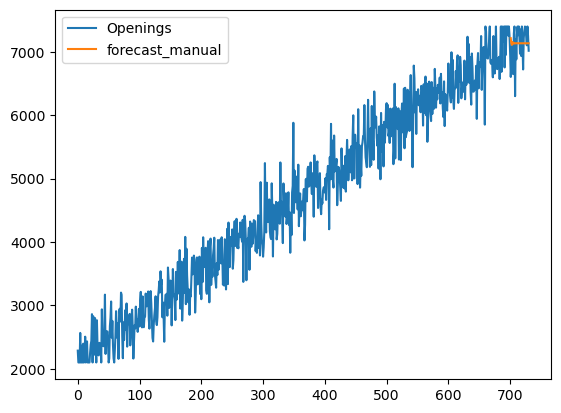

In [60]:
forecast_test = model_fit.forecast(len(ds_test))

ds['forecast_manual'] = [None]*len(ds_train) + list(forecast_test)

ds.plot()

In [61]:
import pmdarima as pm
auto_arima = pm.auto_arima(ds_train, stepwise=False, seasonal=False)
auto_arima

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-p

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)

In [62]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  701
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -5051.523
Date:                Sun, 19 May 2024   AIC                          10117.047
Time:                        00:33:03   BIC                          10148.904
Sample:                             0   HQIC                         10129.362
                                - 701                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     25.9081     12.709      2.039      0.041       1.000      50.816
ar.L1         -0.8773      0.038    -23.054      0.000      -0.952      -0.803
ar.L2         -0.6841      0.050    -13.744      0.000      -0.782      -0.587
ar.L3         -0.5182      0.052     -9.937      0.000      -0.620      -0.416
ar.L4         -0.3467      0.048     -7.150      0.000      -0.442      -0.252
ar.L5         -0.1687      0.039     -4.293      0.000      -0.246      -0.092
sigma2      1.089e+05   5470.612     19.906      0.000    9.82e+04     1.2e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 5.03
Prob(Q):                              0.64   Prob(JB):                         0.08
Heteroskedasticity (H):               1.10   Skew:                             0.09
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

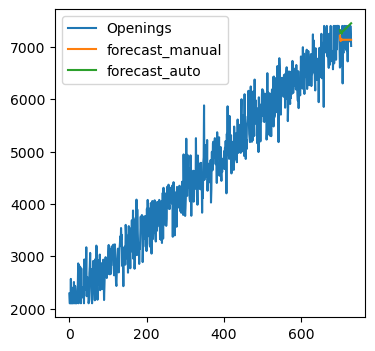

In [63]:
forecast_test_auto = auto_arima.predict(n_periods=len(ds_test))
ds['forecast_auto'] = [None]*len(ds_train) + list(forecast_test_auto)

ds.plot(figsize=(4,4))

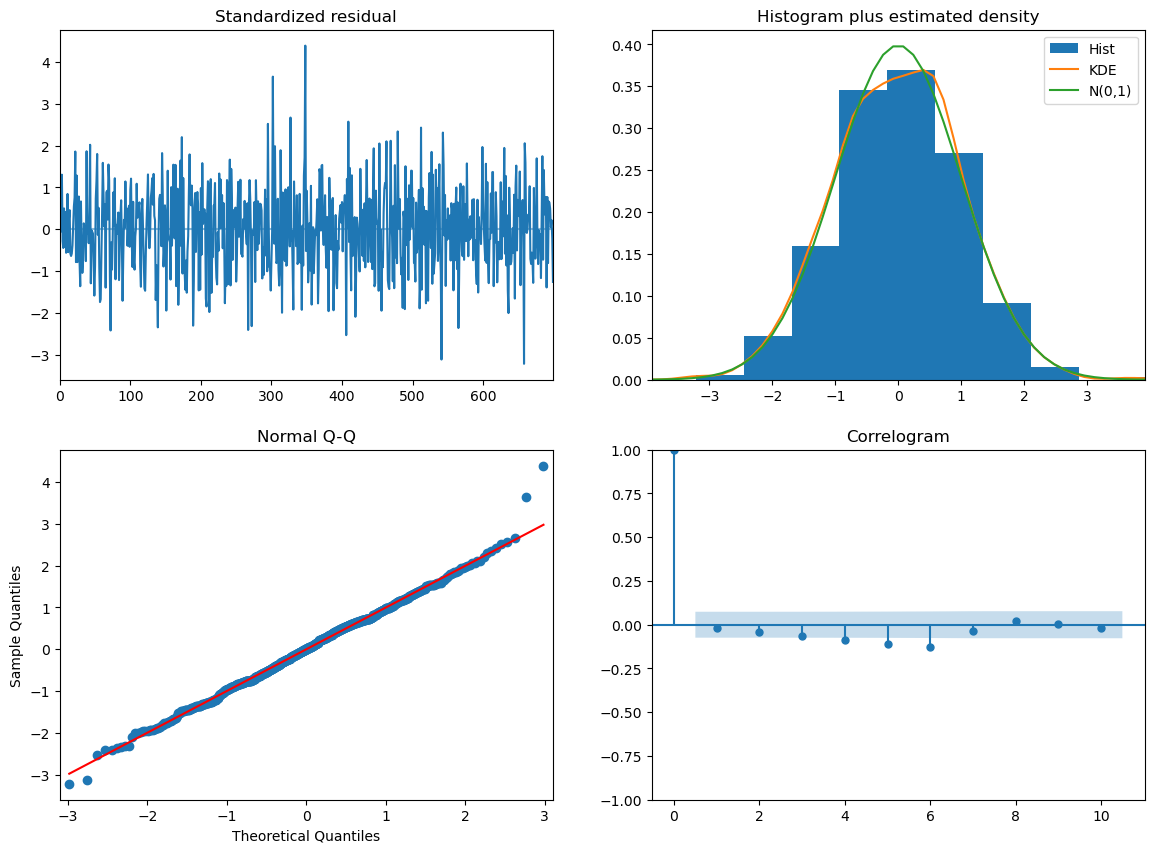

In [64]:
auto_arima.plot_diagnostics(figsize=(14,10))
plt.show()

In [65]:
from datetime import datetime
date1 = datetime(2023, 9, 15)  
date2 = datetime(2026, 3, 1)  
difference = abs((date2 - date1).days)

In [66]:
prediction, confint = auto_arima.predict(n_periods=difference, return_conf_int=True)
p=prediction.tolist()
print(p[-1])

13705.503470667167


In [67]:
import pickle
from statsmodels.tsa.arima.model import ARIMA

# Assume ds_train is your training dataset
model = ARIMA(ds_train, order=(2,1,0))
model_fit = model.fit()

# Save the model to a file using pickle
with open('arima_model.pkl', 'wb') as pkl_file:
    pickle.dump(model_fit, pkl_file)

print("Model saved successfully.")


Model saved successfully.
